In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
#import dtreeviz.trees as dtv # importowanie dtreeviz
from sklearn.model_selection import GridSearchCV
#from dtreeviz.trees import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 

from sklearn.metrics import make_scorer

#import graphviz

from sklearn.metrics import fbeta_score


from sklearn.model_selection import cross_val_score,  StratifiedKFold


In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_M.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df

,ENSG00000212232.1,ENSG00000238741.1,ENSG00000252481.1,ENSG00000239002.3,ENSG00000212443.1,ENSG00000274012.1,ENSG00000252010.1,ENSG00000202198.1,ENSG00000251791.1,ENSG00000202058.1,...,ENSG00000241475.1,ENSG00000274618.1,ENSG00000227293.1,ENSG00000253526.1,ENSG00000270654.1,ENSG00000271394.1,ENSG00000265423.1,ENSG00000253165.1,ENSG00000201901.1,scale
0,27.356617,31.768974,27.356617,5.294829,8.824715,6.645010e+02,2.647415,4.235863e+02,7.059772,16.766959,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
1,8.695633,1.086954,6.521724,2.173908,0.000000,1.758692e+03,1.086954,5.434770e+01,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
2,20.185177,77.002713,7.475992,4.485595,8.971190,2.775836e+03,2.242797,2.609121e+02,6.728392,10.466388,...,0.000000,0.747599,0.0,0.747599,0.0,0.747599,0.000000,0.0,0.000000,M0
3,18.157930,17.431612,6.536855,2.178952,2.905269,2.338741e+02,3.631586,6.827382e+01,1.452634,1.452634,...,0.726317,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,M0
4,29912.168049,21631.677176,9554.333460,20332.131551,5136.495208,1.255850e+06,19221.760289,1.926818e+06,5198.182500,2655.637935,...,0.000000,953.068666,0.0,20.562431,0.0,269.367843,64.771657,0.0,123.374585,M0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,7.748430,3.874215,2.905661,1.937107,0.968554,1.682378e+03,0.000000,6.586165e+01,0.000000,0.968554,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,MX
849,40.077878,17.534072,10.854425,1.669912,12.524337,1.329250e+03,3.339823,9.935974e+01,2.504867,2.504867,...,0.000000,0.000000,0.0,0.834956,0.0,0.000000,0.000000,0.0,0.000000,MX
850,20.868834,16.475395,15.377035,1.098360,8.786877,1.889179e+03,1.098360,7.468846e+01,4.393439,4.393439,...,0.000000,0.000000,0.0,0.000000,0.0,1.098360,0.000000,0.0,0.000000,MX
851,4.708151,12.947416,14.124453,2.354076,9.416302,8.380509e+02,4.708151,2.683646e+02,0.000000,7.062227,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,MX


In [4]:
train_df['scale'].value_counts()

M0    602
MX    143
M1    108
Name: scale, dtype: int64

In [4]:
train_df=train_df.loc[(train_df['scale']!='MX')]

In [5]:
y=train_df['scale']
del train_df['scale']

In [6]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)


In [7]:
ftwo_scorer = make_scorer(fbeta_score,average='binary', beta=1,labels=['M0','M1'],pos_label='M1',greater_is_better=True)


## DObieranie part 1

In [8]:
param_grid = {
    'min_samples_split':range(2,6,2), #
    'min_samples_leaf': range(2,30,5),     #
    'max_leaf_nodes':range(2,30,5), #
    'max_depth':list(range(2, 20,4)), #
    'n_estimators':[100,500] #
}

In [9]:
Grb_1 = GradientBoostingClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 3, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=3,
             param_grid={'max_depth': [2, 6, 10, 14, 18],
                         'max_leaf_nodes': range(2, 30, 5),
                         'min_samples_leaf': range(2, 30, 5),
                         'min_samples_split': range(2, 6, 2),
                         'n_estimators': [100, 500]},
             scoring=make_scorer(fbeta_score, average=binary, beta=1, labels=['M0', 'M1'], pos_label=M1),
             verbose=1)

In [10]:
grid_search_2.best_score_#0.11579231045634207

0.14765974765974765

In [11]:
grid_search_2.best_params_

{'max_depth': 2,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 27,
 'min_samples_split': 2,
 'n_estimators': 500}

## Dobieranie part 2

In [12]:
param_grid = {
    'min_samples_split':range(2,4,1), #
    'min_samples_leaf': range(25,35,1),     #
    'max_leaf_nodes':range(4,11,1), #
    'max_depth':range(2, 4,1), #
    'n_estimators':[500] #
}

In [14]:
Grb_1 = GradientBoostingClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 3, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))


Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=3,
             param_grid={'max_depth': range(2, 4),
                         'max_leaf_nodes': range(4, 11),
                         'min_samples_leaf': range(25, 35),
                         'min_samples_split': range(2, 4),
                         'n_estimators': [500]},
             scoring=make_scorer(fbeta_score, average=binary, beta=1, labels=['M0', 'M1'], pos_label=M1),
             verbose=1)

In [19]:
grid_search_2.best_estimator_

GradientBoostingClassifier(max_leaf_nodes=7, min_samples_leaf=26,
                           n_estimators=500, random_state=42)

In [20]:
grid_search_2.best_score_

0.1707826223955256

In [21]:
grid_search_2.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 26,
 'min_samples_split': 2,
 'n_estimators': 500}

## Dobieranie part 3

In [8]:
param_grid = {
    'min_samples_split':range(2,5,1), #
    'min_samples_leaf': range(20,30,1),     #
    'max_leaf_nodes':range(4,11,1), #
    'max_depth':range(2, 10,1), #
    'n_estimators':[500] #
}

In [10]:
Grb_1 = GradientBoostingClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = Grb_1, param_grid = param_grid, 
                          cv = 5, n_jobs = 6, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))


Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=6,
             param_grid={'max_depth': range(2, 10),
                         'max_leaf_nodes': range(4, 11),
                         'min_samples_leaf': range(20, 30),
                         'min_samples_split': range(2, 5),
                         'n_estimators': [500]},
             scoring=make_scorer(fbeta_score, average=binary, beta=1, labels=['M0', 'M1'], pos_label=M1),
             verbose=1)

In [14]:
grid_search_2.best_estimator_

GradientBoostingClassifier(max_leaf_nodes=7, min_samples_leaf=21,
                           n_estimators=500, random_state=42)

In [12]:
grid_search_2.best_score_

0.17135907260045188

In [13]:
grid_search_2.best_params_

{'max_depth': 3,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 21,
 'min_samples_split': 2,
 'n_estimators': 500}

## Dobieranie part 4

In [ ]:
param_grid = {
    'min_samples_split':range(2,5,1), #2
    'min_samples_leaf': range(20,30,1),     #21
    'max_leaf_nodes':range(4,11,1), #7
    'max_depth':range(2, 5,1), #3
    'n_estimators':[500] #
}

## Cross - walidacja

In [15]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = GradientBoostingClassifier(max_leaf_nodes=7, min_samples_leaf=21,
                           n_estimators=500, random_state=42,max_depth=3)
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=fbeta_score(caly_label[test], predykcje, average='binary', beta=1,labels=['M0','M1'],pos_label='M1')
    wart_2.append(blad)
    licznik+=1

In [16]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_M_Gradient_boosting.csv')

In [3]:
dane_do_zapisu_2=pd.read_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\M\\Klasa_M_Gradient_boosting.csv')

In [17]:
wart_2

[0.0, 0.07692307692307693, 0.14285714285714288, 0.0, 0.22222222222222218]

In [18]:
sum(wart_2)/len(wart_2) #0.032977654217233775

0.08840048840048839

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [6]:
import seaborn as sns

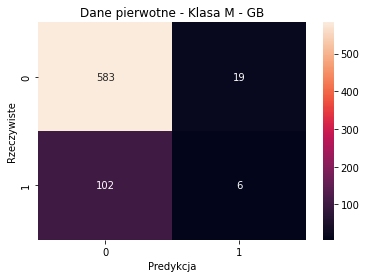

In [7]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa M - GB')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [23]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1')
f1score=fbeta_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['M0','M1'], average='binary',pos_label='M1', beta=1)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.056
Precision: 0.240
F1score: 0.090
